<a href="https://colab.research.google.com/github/smccracken13/Zestimate-Project/blob/main/Zestimate_EDA_(McCracken).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis
https://www.kaggle.com/competitions/zillow-prize-1

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from google.colab import files

In [95]:
files.upload()
print()

Saving zillow.csv to zillow.csv



In [101]:
df16 = pd.read_csv('zillow.csv', low_memory=False, index_col = 'Unnamed: 0')

In [102]:
# Set rawcensustractandblock aside for now. We may choose to parse info from it later.
df_census = df16[['parcelid','rawcensustractandblock']]
df16.drop(columns=['rawcensustractandblock'], inplace=True)

In [103]:
df16.head()

,parcelid,logerror,transaction_month,transaction_day,transaction_quarter,aircon,architecture,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,tav_built,tax_assessed_value,assessmentyear,tav_land,property_tax,taxdelinquencyflag,taxdelinquencyyear,age
0,11016594,0.0276,Jan,1,1st,Central,not given,not given,2.0,3.0,...,1.0,not given,122754.0,360170.0,2015.0,237416.0,6735.88,0.0,not applicable,57.0
1,14366692,-0.1684,Jan,1,1st,not given,not given,not given,3.5,4.0,...,1.0,not given,346458.0,585529.0,2015.0,239071.0,10153.02,0.0,not applicable,2.0
2,12098116,-0.0040,Jan,1,1st,Central,not given,not given,3.0,2.0,...,1.0,not given,61994.0,119906.0,2015.0,57912.0,11484.48,0.0,not applicable,76.0
3,12643413,0.0218,Jan,2,1st,Central,not given,not given,2.0,2.0,...,1.0,not given,171518.0,244880.0,2015.0,73362.0,3048.74,0.0,not applicable,29.0
4,14432541,-0.0050,Jan,2,1st,not given,not given,not given,2.5,4.0,...,2.0,not given,169574.0,434551.0,2015.0,264977.0,5488.96,0.0,not applicable,35.0


In [104]:
pd.set_option('display.max_rows', 70)
df16.dtypes

parcelid                  int64
logerror                float64
transaction_month        object
transaction_day           int64
transaction_quarter      object
aircon                   object
architecture             object
basementsqft             object
bathroomcnt             float64
bedroomcnt              float64
framing                  object
quality                 float64
deck                     object
home_sqft               float64
fips                    float64
fireplacecnt            float64
garagecarcnt            float64
garage_sqft             float64
has_spa                  object
heating                  object
latitude                float64
longitude               float64
lot_sqft                float64
poolcnt                 float64
poolsizesum              object
pool_with_spa            object
pool_without_spa         object
county_land_use_code     object
land_use_code            object
zoning_code              object
city                     object
county  

In [105]:
num_cols = ['bathroomcnt', 'bedroomcnt', 'quality', 'home_sqft', 'fireplacecnt', 'garagecarcnt',
            'garage_sqft', 'latitude', 'longitude', 'lot_sqft', 'poolcnt', 'roomcnt', 'unitcnt',
            'numberofstories','tav_built','tax_assessed_value','tav_land','property_tax','age']

cat_cols = ['transaction_month', 'transaction_day','transaction_quarter','aircon',
            'architecture', 'basementsqft', 'framing', 'deck','fips', 'heating',
            'poolsizesum', 'county_land_use_code', 'land_use_code','zoning_code',
            'city', 'county', 'neighborhood','zipcode', 'storytypeid', 'material',
            'patio_sqft', 'shed_sqft','assessmentyear', 'taxdelinquencyyear']

bool_cols = ['has_spa', 'pool_with_spa', 'pool_without_spa', 'fireplaceflag', 'taxdelinquencyflag']

In [106]:
df16[num_cols].dtypes

bathroomcnt           float64
bedroomcnt            float64
quality               float64
home_sqft             float64
fireplacecnt          float64
garagecarcnt          float64
garage_sqft           float64
latitude              float64
longitude             float64
lot_sqft              float64
poolcnt               float64
roomcnt               float64
unitcnt               float64
numberofstories       float64
tav_built             float64
tax_assessed_value    float64
tav_land              float64
property_tax          float64
age                   float64
dtype: object

In [107]:
df16[cat_cols].dtypes

transaction_month        object
transaction_day           int64
transaction_quarter      object
aircon                   object
architecture             object
basementsqft             object
framing                  object
deck                     object
fips                    float64
heating                  object
poolsizesum              object
county_land_use_code     object
land_use_code            object
zoning_code              object
city                     object
county                   object
neighborhood             object
zipcode                  object
storytypeid              object
material                 object
patio_sqft               object
shed_sqft                object
assessmentyear          float64
taxdelinquencyyear       object
dtype: object

In [108]:
df16[bool_cols].dtypes

has_spa                object
pool_with_spa          object
pool_without_spa       object
fireplaceflag          object
taxdelinquencyflag    float64
dtype: object

# Explore Log Error

In [109]:
print('Log Error statistics')
print(df16.logerror.describe())

Log Error statistics
count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


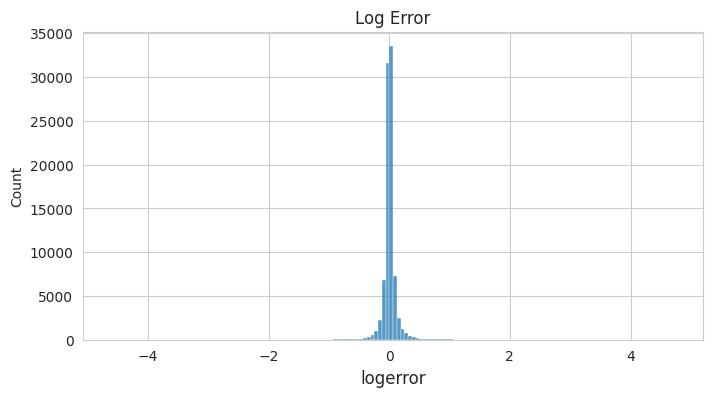

In [110]:
# Log Error Histogram
plt.figure(figsize=(8,4))
sns.histplot(df16.logerror.values, bins=150)
plt.xlabel('logerror', fontsize=12)
plt.title('Log Error')
plt.show()

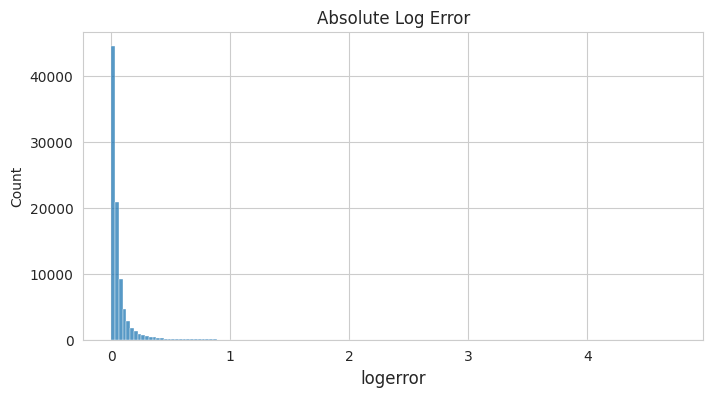

In [111]:
# Absolute Log Error Histogram
plt.figure(figsize=(8,4))
sns.histplot(abs(df16.logerror.values), bins=150)
plt.xlabel('logerror', fontsize=12)
plt.title('Absolute Log Error')
plt.show()

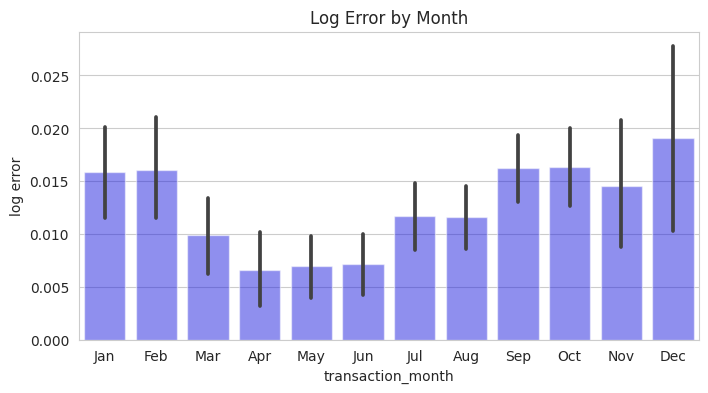

In [112]:
# logerror over time
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(8,4))
sns.barplot(x=df16['transaction_month'], y=df16.logerror.values, data = df16, order = months, color='blue', alpha=0.5)
plt.ylabel('log error')
plt.title('Log Error by Month')
plt.show()

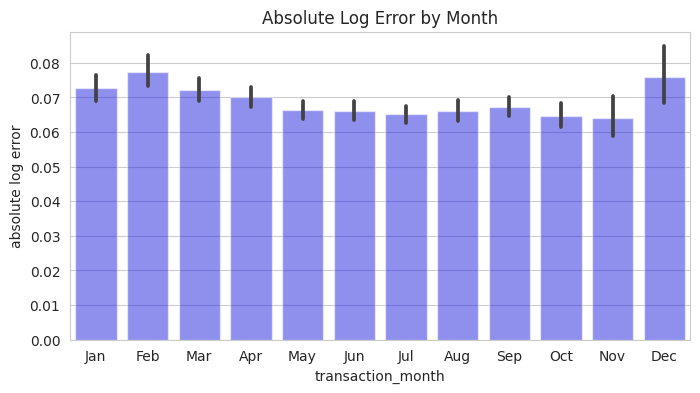

In [113]:
# Absolute logerror over time
plt.figure(figsize=(8,4))
sns.barplot(x=df16['transaction_month'], y=abs(df16.logerror), data = df16, order = months, color='blue', alpha=0.5)
plt.ylabel('absolute log error')
plt.title('Absolute Log Error by Month')
plt.show()

Absolute Log Error is highest from Dec-Mar. This is typically the slow season of house sales, so it makes that predictions are harder. There are fewer comparable transactions.

# Examine transactions per month

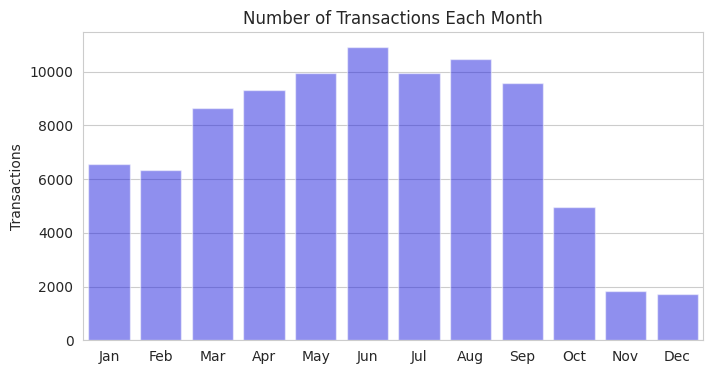

In [114]:
# Number of transactions per Month
plt.figure(figsize=(8,4))
x = df16.transaction_month.value_counts().index
y = df16.transaction_month.value_counts()
sns.barplot(x=x, y=y, alpha =0.5, color='blue', order=months)
plt.ylabel('Transactions')
plt.title('Number of Transactions Each Month')
plt.show()

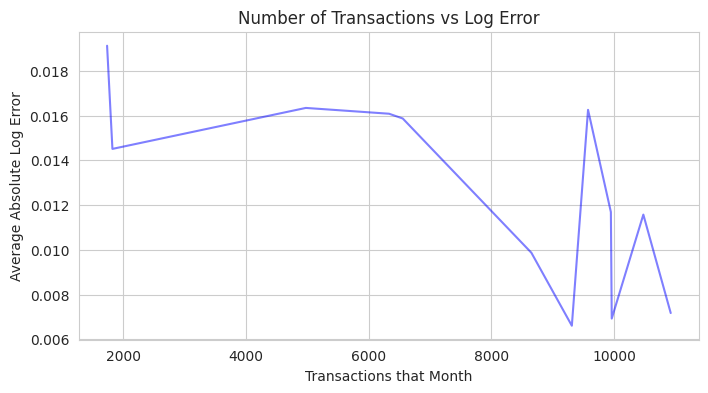

In [115]:
# Abs Log Error vs # of transactions
plt.figure(figsize=(8,4))
x = df16.transaction_month.value_counts()
y = abs(df16.groupby('transaction_month')['logerror'].mean())
sns.lineplot(x=x, y=y, alpha =0.5, color='blue')
plt.xlabel('Transactions that Month')
plt.ylabel('Average Absolute Log Error')
plt.title('Number of Transactions vs Log Error')
plt.show()

In [116]:
# Correlation with absolute log error
corr_dict = {}
for col in num_cols:
  corr_dict[col] = abs(df16['logerror']).corr(df16[col])
corr_df = pd.DataFrame(corr_dict.items(), columns = ['Feature','Corr to Abs Log'])
print(corr_df.sort_values('Corr to Abs Log', ascending=False))

               Feature  Corr to Abs Log
18                 age         0.114116
17        property_tax         0.048279
12             unitcnt         0.043556
16            tav_land         0.039969
15  tax_assessed_value         0.038338
3            home_sqft         0.038086
14           tav_built         0.026477
2              quality         0.024392
7             latitude         0.019167
1           bedroomcnt         0.001220
9             lot_sqft        -0.001199
0          bathroomcnt        -0.006541
10             poolcnt        -0.006833
13     numberofstories        -0.023893
4         fireplacecnt        -0.023977
11             roomcnt        -0.035022
8            longitude        -0.036256
6          garage_sqft        -0.041402
5         garagecarcnt        -0.062459


In [117]:
print('Max Corr: Age', corr_df['Corr to Abs Log'].max())
print('Min Corr: GarageCarCnt', corr_df['Corr to Abs Log'].min())

Max Corr: Age 0.11411637610580057
Min Corr: GarageCarCnt -0.06245881887971029


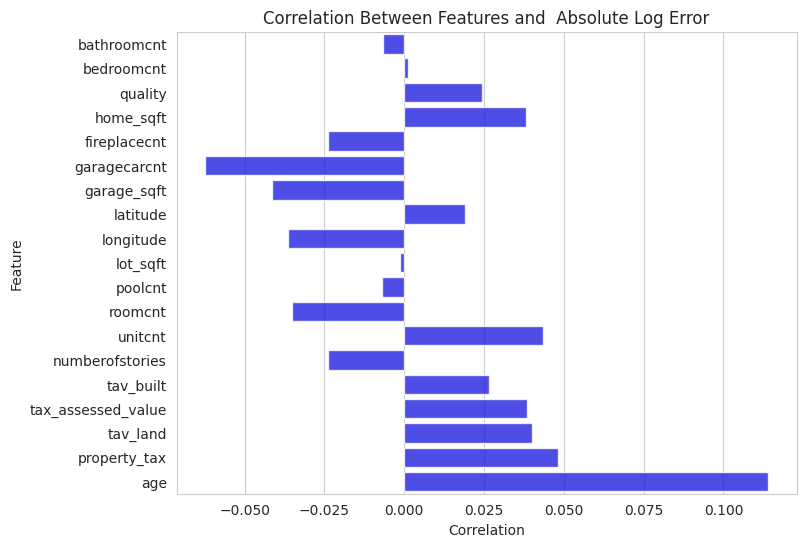

In [118]:
# Create horizontal barplot using Seaborn
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
barplot = sns.barplot(x='Corr to Abs Log', y='Feature', data=corr_df, color='blue', alpha=0.8)

# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation Between Features and  Absolute Log Error')

plt.show()

In [119]:
# Things to plot vs log error
medium_corr = corr_df[(abs(corr_df['Corr to Abs Log']) > 0.03) & (abs(corr_df['Corr to Abs Log']) < 0.05)]
higher_corr = corr_df[abs(corr_df['Corr to Abs Log'])>0.05]
print('Medium Corr with Abs Log Error')
print(medium_corr.sort_values('Corr to Abs Log', ascending=False))
print()
print('Higher Corr with Abs Log Error')
print(higher_corr.sort_values('Corr to Abs Log', ascending=False))

Medium Corr with Abs Log Error
               Feature  Corr to Abs Log
17        property_tax         0.048279
12             unitcnt         0.043556
16            tav_land         0.039969
15  tax_assessed_value         0.038338
3            home_sqft         0.038086
11             roomcnt        -0.035022
8            longitude        -0.036256
6          garage_sqft        -0.041402

Higher Corr with Abs Log Error
         Feature  Corr to Abs Log
18           age         0.114116
5   garagecarcnt        -0.062459


# Plot high corr features vs log error

Text(0.5, 1.0, 'Age vs Abs Log Error')

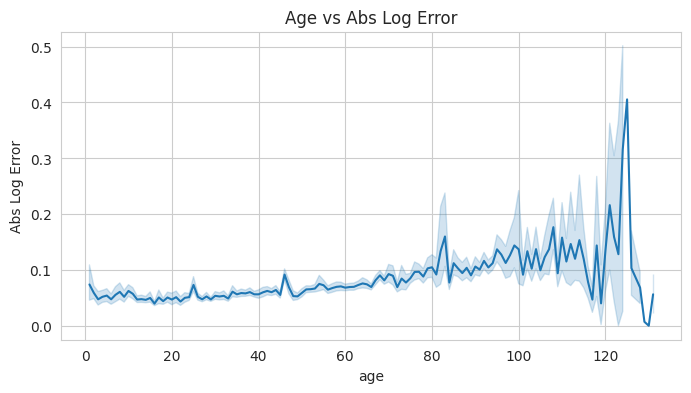

In [120]:
# Age vs Abs Log Error
plt.figure(figsize=(8,4))
sns.lineplot(data=df16, x='age', y=abs(df16['logerror']))
plt.ylabel('Abs Log Error')
plt.title('Age vs Abs Log Error')
# Prediction accuracy is lower for older homes, particularly very old homes

Text(0.5, 1.0, 'Garage Car Count vs Abs Log Error')

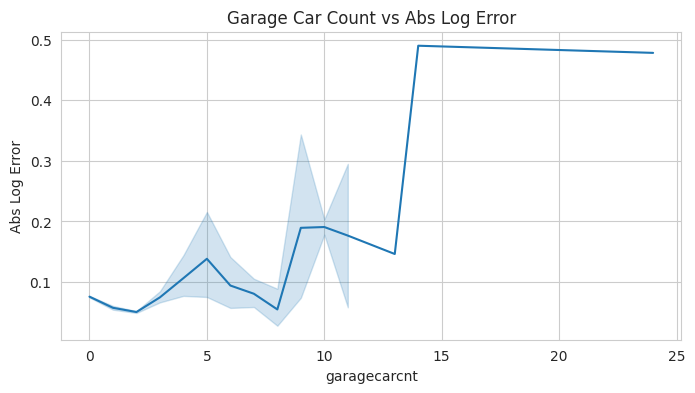

In [121]:
# Garage Car Count vs Abs Log Error
plt.figure(figsize=(8,4))
sns.lineplot(data=df16, x='garagecarcnt', y=abs(df16['logerror']))
plt.ylabel('Abs Log Error')
plt.title('Garage Car Count vs Abs Log Error')
# Prediction accuracy is lower for homes with very large garages
# There are two steps, more than 8 cars, and more than 13 cars

Text(0.5, 1.0, 'Pool Size vs Abs Log Error')

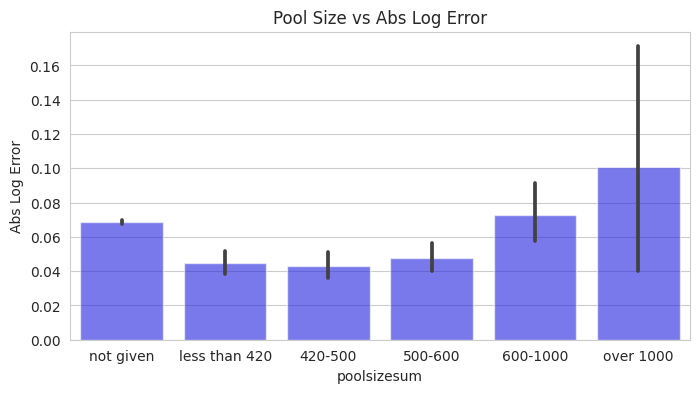

In [122]:
# Pool Size vs Abs Log Error
pool_sizes = ['not given', 'less than 420', '420-500', '500-600', '600-1000', 'over 1000']
plt.figure(figsize=(8,4))
sns.barplot(data=df16, x='poolsizesum', y=abs(df16['logerror']), order = pool_sizes, color='blue', alpha = 0.6)
plt.ylabel('Abs Log Error')
plt.title('Pool Size vs Abs Log Error')
# Prediction accuracy is lower for homes with very large pools

Text(0.5, 1.0, 'Tax Delinq Year vs Abs Log Error')

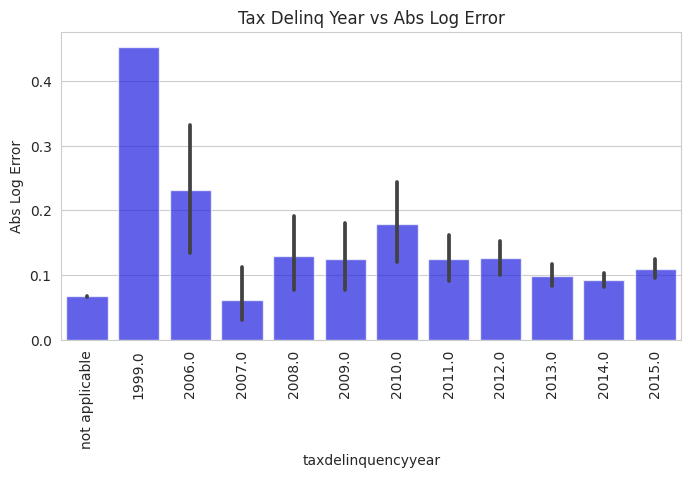

In [123]:
# Tax Delinquency Year vs Abs Log Error
years = ['not applicable', '1999.0','2006.0','2007.0','2008.0','2009.0','2010.0','2011.0', '2012.0', '2013.0', '2014.0','2015.0',   ]
plt.figure(figsize=(8,4))
g = sns.barplot(data=df16, x='taxdelinquencyyear', y=abs(df16['logerror']), order=years, color='blue', alpha=0.7)
g.tick_params(axis='x', rotation=90)
plt.ylabel('Abs Log Error')
plt.title('Tax Delinq Year vs Abs Log Error')
# Prediction accuracy is lower for older delinquency data

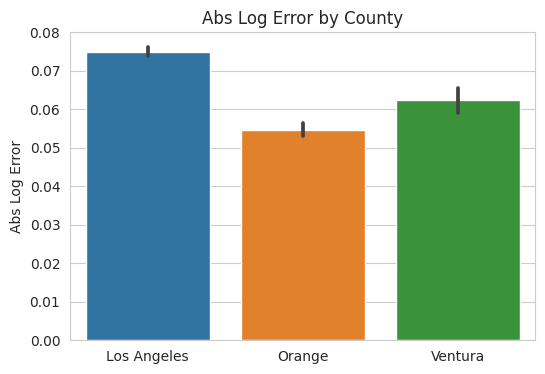

In [124]:
# Log Error vs County
plt.figure(figsize=(6,4))
x= df16.county
y= abs(df16.logerror)
sns.barplot(x=x, y=y)
plt.ylabel('Abs Log Error')
plt.xlabel('')
plt.title('Abs Log Error by County')
plt.show()

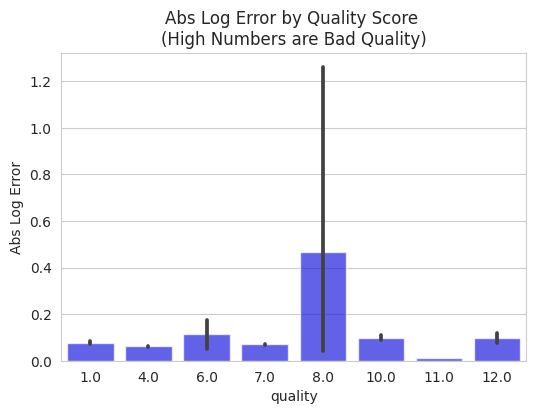

In [125]:
# Log Error vs Quality
plt.figure(figsize=(6,4))
x= df16.quality
y= abs(df16.logerror)
sns.barplot(x=x, y=y, color = 'blue', alpha = 0.7)
plt.ylabel('Abs Log Error')
plt.title('Abs Log Error by Quality Score \n(High Numbers are Bad Quality)')
plt.show()
# It appears "8" is a very common rating for quality and is not very helpful for the Zestimate

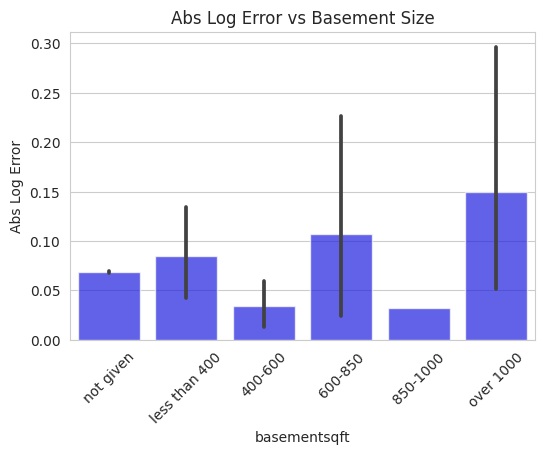

In [126]:
# Log Error vs Basement Square Footage
basement_sizes = ['not given', 'less than 400', '400-600', '600-850', '850-1000', 'over 1000']
plt.figure(figsize=(6,4))
g = sns.barplot(data=df16,x='basementsqft', y=abs(df16.logerror), order = basement_sizes, color = 'blue', alpha =0.7)
plt.ylabel('Abs Log Error')
plt.title('Abs Log Error vs Basement Size')
g.tick_params(axis='x', rotation=45)
plt.show()
# Basement size doesn't have an obvious affect on prediction accuracy

# Plot historgrames of numerical features

In [127]:
# create function to speed up plotting
def hist_list(list, bins):
  list = list
  fig, ax =plt.subplots(1,len(list), figsize=(12,4))
  for i in range(len(list)):
    sns.histplot(data=df16, x=list[i], ax=ax[i], bins = bins)
  plt.show()

In [128]:
num_cols

['bathroomcnt',
 'bedroomcnt',
 'quality',
 'home_sqft',
 'fireplacecnt',
 'garagecarcnt',
 'garage_sqft',
 'latitude',
 'longitude',
 'lot_sqft',
 'poolcnt',
 'roomcnt',
 'unitcnt',
 'numberofstories',
 'tav_built',
 'tax_assessed_value',
 'tav_land',
 'property_tax',
 'age']

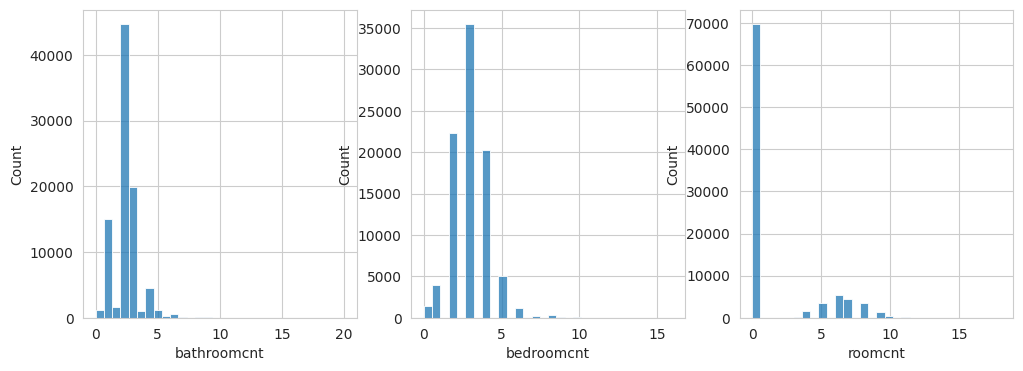

In [129]:
# Histograms of 'room' counts
hist_list(['bathroomcnt', 'bedroomcnt', 'roomcnt'], 30)

In [130]:
# It is extremely supsicious that nearly 70,000 homes have "0 rooms"
# I am going to change 0 to -999
df16.loc[df16['roomcnt']==0,'roomcnt']=-999
df16.roomcnt.value_counts()

-999.0    69700
 6.0       5353
 7.0       4487
 5.0       3486
 8.0       3410
 4.0       1673
 9.0       1356
 10.0       364
 3.0        271
 11.0       111
 12.0        33
 13.0        11
 2.0         10
 14.0         4
 1.0          3
 15.0         2
 18.0         1
Name: roomcnt, dtype: int64

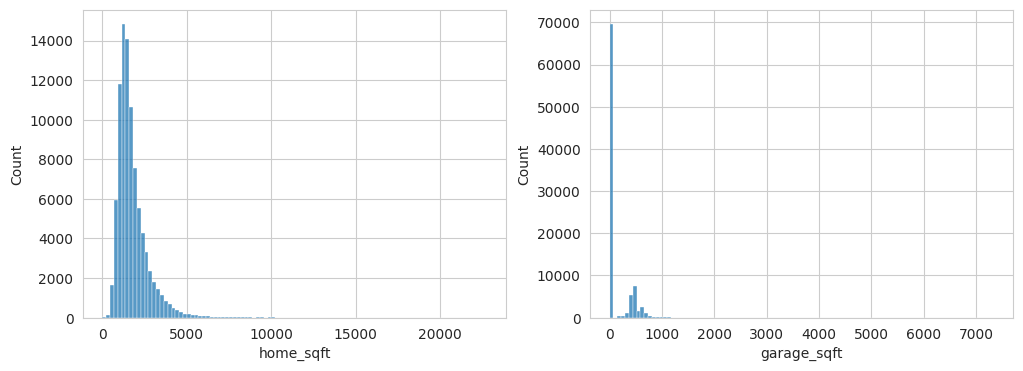

In [131]:
# Histograms of square footage info
# 'home_sqft', 'garagesqft'
hist_list(['home_sqft', 'garage_sqft'], 100)

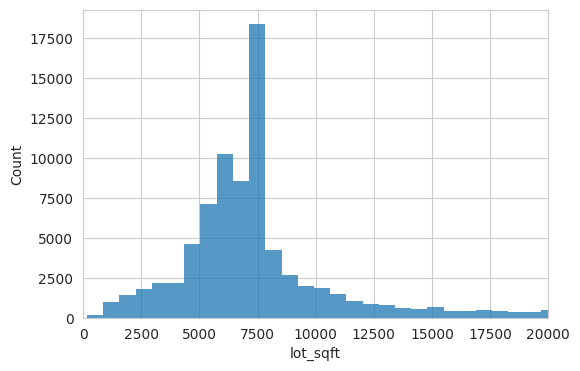

In [132]:
# Histogram of lot_sqft (removing an outlier of a massive garage)
plt.figure(figsize=(6,4))
g=sns.histplot(data=df16, x='lot_sqft', bins=10000)
g.set(xlim=(0, 20000))
plt.show()

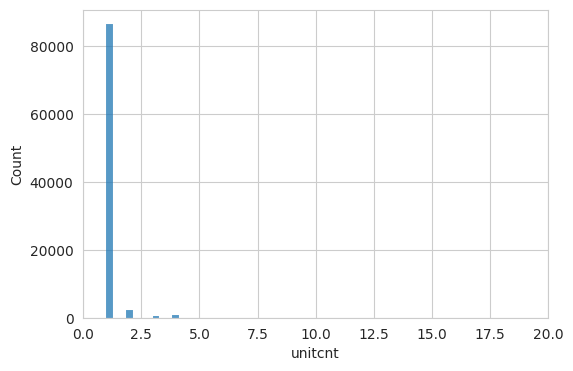

In [133]:
# Histogram of unitcnt (removing outliers of large unit counts)
plt.figure(figsize=(6,4))
g=sns.histplot(data=df16, x='unitcnt', bins=500)
g.set(xlim=(0, 20))
plt.show()

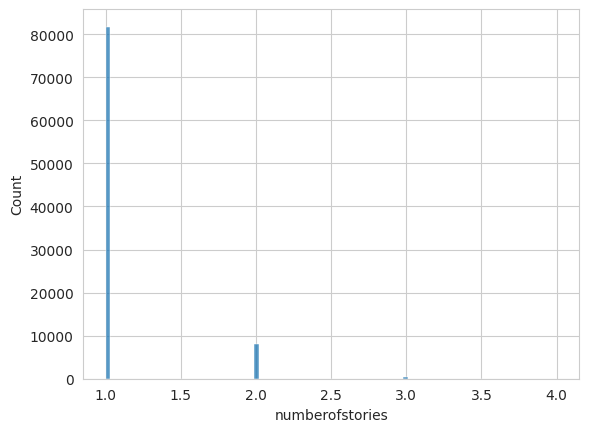

In [134]:
# Histogram of number of stories
g=sns.histplot(data=df16, x='numberofstories', bins=100)
plt.show()

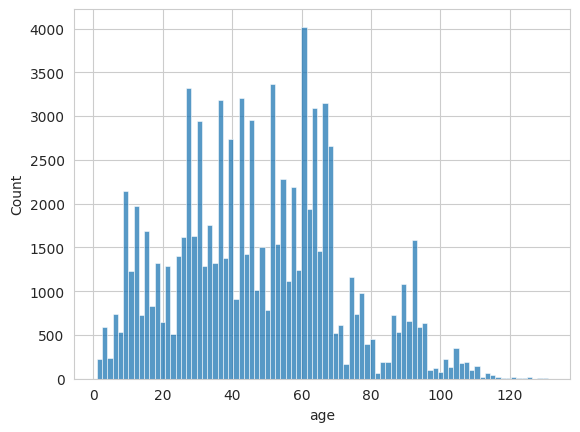

In [135]:
# Histogram of age
g=sns.histplot(data=df16, x='age', bins='auto')
plt.show()

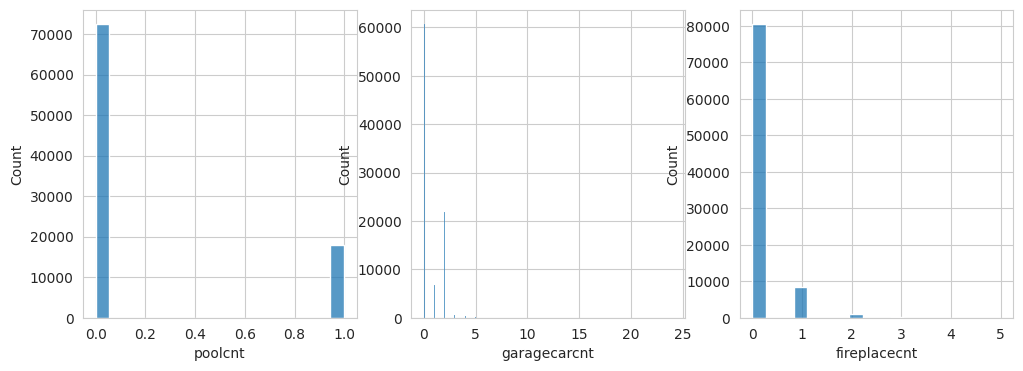

In [136]:
# Histogram of pool count and garage car count
hist_list(['poolcnt', 'garagecarcnt', 'fireplacecnt'], 'auto')

Text(0.5, 1.0, 'Pool Size Histogram')

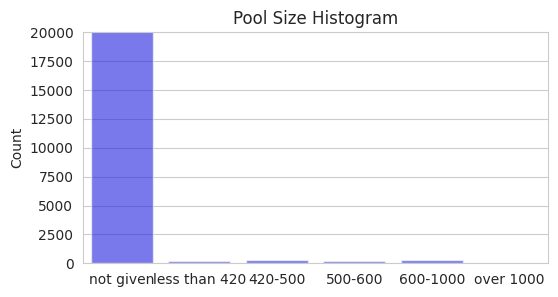

In [137]:
# Pool Size Histogram
# There are close to 90,000 'not given'
pool_sizes = ['not given', 'less than 420', '420-500', '500-600', '600-1000', 'over 1000']
plt.figure(figsize=(6,3))
g =sns.barplot(data=df16, x=df16['poolsizesum'].value_counts().index, y=df16['poolsizesum'].value_counts(), order = pool_sizes, color='blue', alpha = 0.6)
g.set(ylim=(0,20000))
plt.ylabel('Count')
plt.title('Pool Size Histogram')

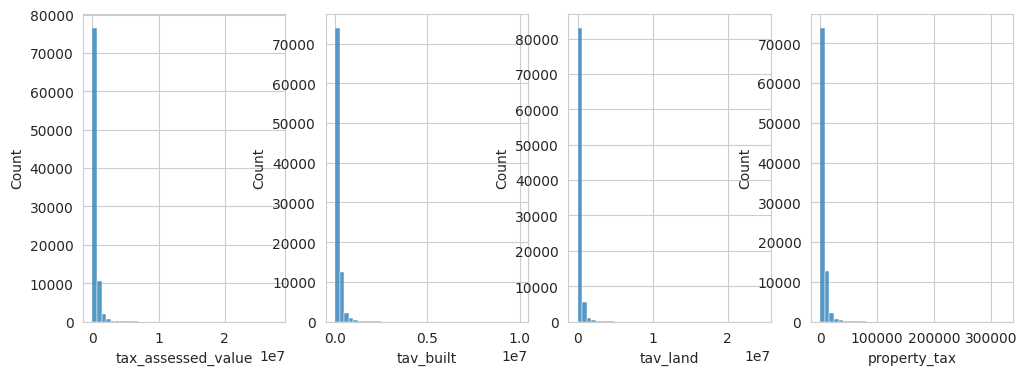

In [138]:
# Histograms of tax details
# 'tax_assessed_value', 'tav_built', 'tav_land', 'property_tax','taxdelinquencyyear', 'assessmentyear'
hist_list(['tax_assessed_value', 'tav_built', 'tav_land', 'property_tax'],40)

In [139]:
print("TAV min:", df16.tax_assessed_value.min())
print("TAV median:", df16.tax_assessed_value.median())
print("TAV mean:", round(df16.tax_assessed_value.mean(), 1))
print("TAV max:", df16.tax_assessed_value.max())

TAV min: 22.0
TAV median: 342872.0
TAV mean: 457671.4
TAV max: 27750000.0


In [140]:
# Why would two properties have a TAV of 22?
df16[df16['tax_assessed_value']<=10000].sort_values('tax_assessed_value')

,parcelid,logerror,transaction_month,transaction_day,transaction_quarter,aircon,architecture,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,tav_built,tax_assessed_value,assessmentyear,tav_land,property_tax,taxdelinquencyflag,taxdelinquencyyear,age
16045,12566319,-0.0263,Mar,14,1st,not given,not given,not given,0.0,0.0,...,1.0,not given,132000.0,22.0,2015.0,22.0,1556.26,0.0,not applicable,46.0
25390,12431927,-0.0715,Apr,14,2nd,not given,not given,not given,2.0,2.0,...,1.0,not given,132000.0,22.0,2015.0,22.0,2409.92,0.0,not applicable,43.0
12176,11524235,2.5440,Feb,26,1st,not given,not given,not given,0.0,0.0,...,1.0,not given,104.0,1044.0,2015.0,940.0,64.00,0.0,not applicable,11.0
13388,14355387,0.0516,Mar,2,1st,not given,not given,not given,0.0,0.0,...,1.0,not given,132000.0,1928.0,2015.0,1928.0,14010.90,0.0,not applicable,46.0
79750,14355872,0.0247,Sep,27,3rd,not given,not given,not given,0.0,0.0,...,1.0,not given,132000.0,2675.0,2015.0,2675.0,17624.44,0.0,not applicable,46.0
88869,12272795,0.0611,Dec,7,4th,not given,not given,not given,1.0,1.0,...,1.0,not given,4667.0,7704.0,2015.0,3037.0,661.12,1.0,2015.0,68.0
28207,14646864,0.1898,Apr,22,2nd,Central,not given,not given,1.0,1.0,...,1.0,not given,3918.0,7837.0,2015.0,3919.0,96.74,0.0,not applicable,42.0
56347,12231898,0.2654,Jul,15,3rd,not given,not given,not given,1.0,1.0,...,1.0,not given,3448.0,8314.0,2015.0,4866.0,348.89,0.0,not applicable,94.0
6709,14506872,0.7343,Feb,1,1st,not given,not given,not given,1.0,1.0,...,1.0,not given,3286.0,8629.0,2015.0,5343.0,108.98,0.0,not applicable,83.0
62877,11377029,1.3790,Aug,3,3rd,not given,not given,not given,0.0,1.0,...,1.0,not given,113.0,9271.0,2015.0,9158.0,244.11,0.0,not applicable,61.0


# Plot boxplots of boolean features vs Log Error

In [141]:
bool_cols

['has_spa',
 'pool_with_spa',
 'pool_without_spa',
 'fireplaceflag',
 'taxdelinquencyflag']

In [142]:
# create function to speed up plotting
def boxplot_list(df, list):
  list = list
  fig, ax =plt.subplots(1,len(list), figsize=(20,4))
  for i in range(len(list)):
    sns.boxplot(data=df, y=df16.logerror, x=list[i], ax=ax[i]).set_title(list[i])
  plt.show()

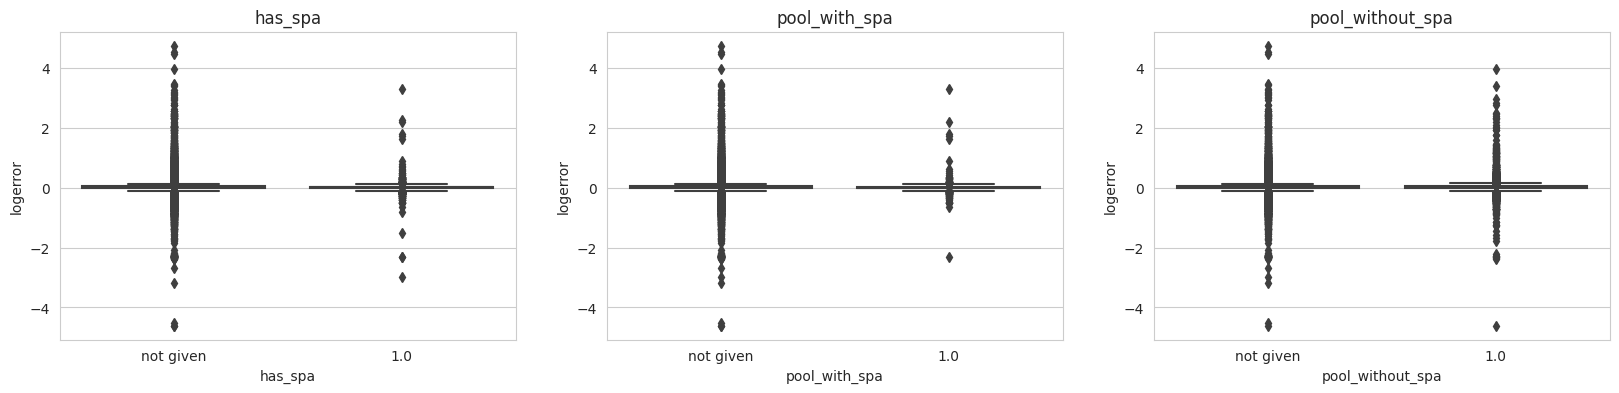

In [143]:
# Examine logerror versus pool data if NaNs = 0
boxplot_list(df16, ['has_spa', 'pool_with_spa','pool_without_spa'])

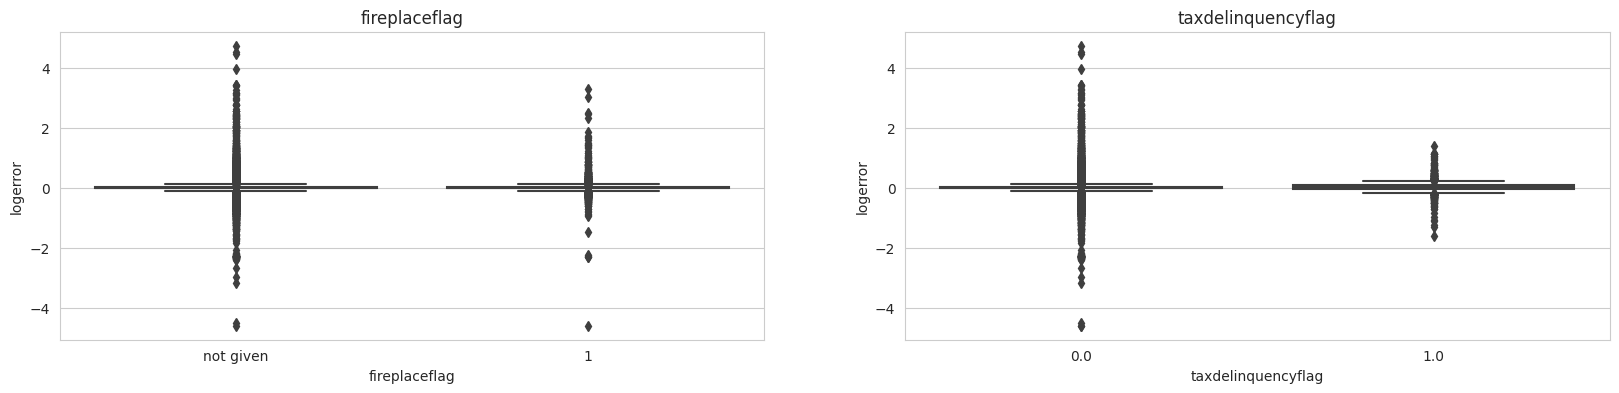

In [144]:
# Examine logerror versus other boolean data if NaNs = 0
boxplot_list(df16, ['fireplaceflag','taxdelinquencyflag'])

In [145]:
df16.fireplaceflag.value_counts()

not given    80446
1             9829
Name: fireplaceflag, dtype: int64

The True cases of the boolean features seem to greatly reduce log error.

# Log Error vs Geography

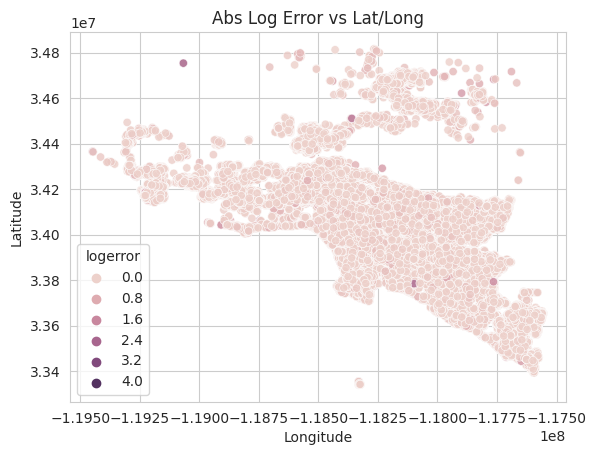

In [146]:
# Plot latitude and longitude data
x, y = df16['longitude'], df16['latitude']
sns.scatterplot(x=x, y=y, color='red', alpha=0.8, hue=abs(df16.logerror))

# Set plot title and axis labels
plt.title('Abs Log Error vs Lat/Long')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

In [147]:
# Create a latitutde longitude dataset for tableau
tab16 = df16[['logerror','latitude','longitude']]
tab16['abslogerror'] =abs(tab16.logerror)
tab16.dropna(inplace=True)
tab16 = tab16.sample(frac=0.2, random_state = 1)
# from google.colab import files
# tab16.to_csv('tab16.csv', encoding = 'utf-8-sig') 
# files.download('tab16.csv')

<ipython-input-147-fa4e315aec15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab16['abslogerror'] =abs(tab16.logerror)
<ipython-input-147-fa4e315aec15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab16.dropna(inplace=True)


There is not an obvious association between geography and logerror.

# Log Error vs Year Built

# Create high, medium, low log error segments
bad est = over 90 percentile abs log error

typical est = 25-75 perentile abs log error

good est = under 10 percentile abs log error

In [148]:
# Create absolute log error df
df16['abs_log_error']=abs(df16['logerror'])

# Get percentiles
q1 = df16['abs_log_error'].quantile(0.25)
q3 = df16['abs_log_error'].quantile(0.75)
worst10 = df16['abs_log_error'].quantile(0.90)
best10 = df16['abs_log_error'].quantile(0.10)

# Filter to get the rows with the highest abs_log_error
bad_est = df16[df16['abs_log_error'] >= worst10]

# Filter to get 25%-75% abs_log error
typical_est = df16[(df16['abs_log_error'] >= q1) & (df16['abs_log_error'] <= q3)]

# Filter to get rows with least abs_log_error
good_est = df16[df16['abs_log_error'] >= best10]

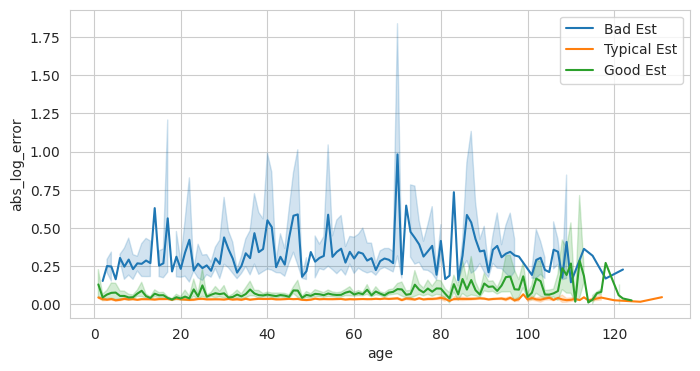

In [149]:
# See how age affects different estimate segments
plt.figure(figsize=(8,4))
sns.lineplot(x='age', y='abs_log_error', data=bad_est.sample(frac=0.1, replace=False, random_state=1), label='Bad Est')
sns.lineplot(x='age', y='abs_log_error', data=typical_est.sample(frac=0.1, replace=False, random_state=1), label='Typical Est')
sns.lineplot(x='age', y='abs_log_error', data=good_est.sample(frac=0.1, replace=False, random_state=1), label='Good Est')
plt.legend()

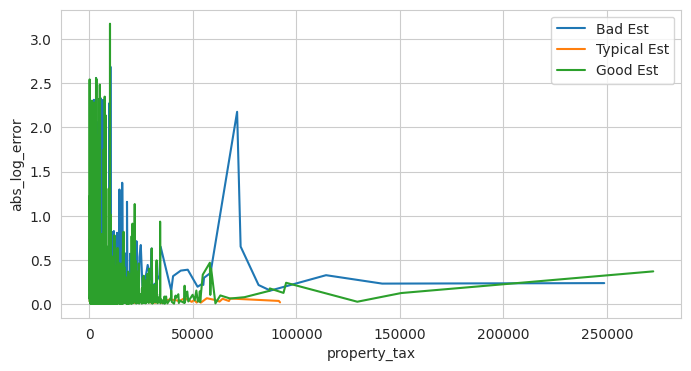

In [150]:
# See how property_tax affects different estimate segments
plt.figure(figsize=(8,4))
sns.lineplot(x='property_tax', y='abs_log_error', data=bad_est.sample(frac=0.1, replace=False, random_state=1), label='Bad Est')
sns.lineplot(x='property_tax', y='abs_log_error', data=typical_est.sample(frac=0.1, replace=False, random_state=1), label='Typical Est')
sns.lineplot(x='property_tax', y='abs_log_error', data=good_est.sample(frac=0.1, replace=False, random_state=1), label='Good Est')
plt.legend()

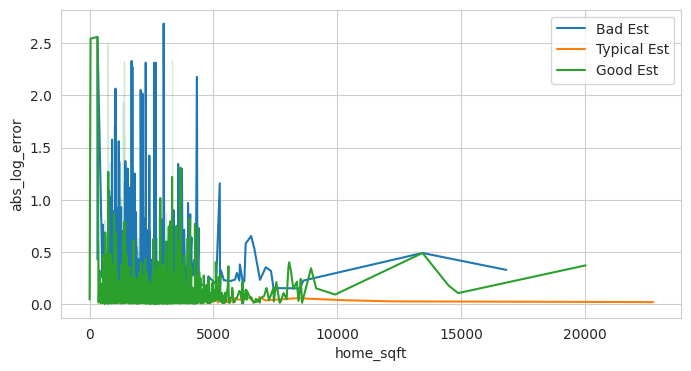

In [151]:
# See how home_sqft affects different estimate segments
plt.figure(figsize=(8,4))
sns.lineplot(x='home_sqft', y='abs_log_error', data=bad_est.sample(frac=0.1, replace=False, random_state=1), label='Bad Est')
sns.lineplot(x='home_sqft', y='abs_log_error', data=typical_est.sample(frac=0.1, replace=False, random_state=1), label='Typical Est')
sns.lineplot(x='home_sqft', y='abs_log_error', data=good_est.sample(frac=0.1, replace=False, random_state=1), label='Good Est')
plt.legend()

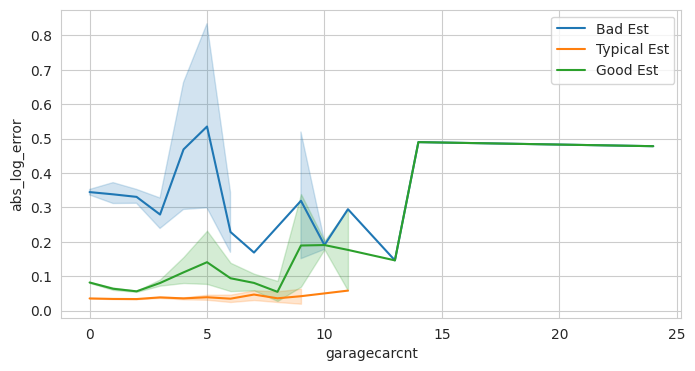

In [152]:
# See how garagecnt affects different estimate segments
plt.figure(figsize=(8,4))
sns.lineplot(x='garagecarcnt', y='abs_log_error', data=bad_est, label='Bad Est')
sns.lineplot(x='garagecarcnt', y='abs_log_error', data=typical_est, label='Typical Est')
sns.lineplot(x='garagecarcnt', y='abs_log_error', data=good_est, label='Good Est')
plt.legend()

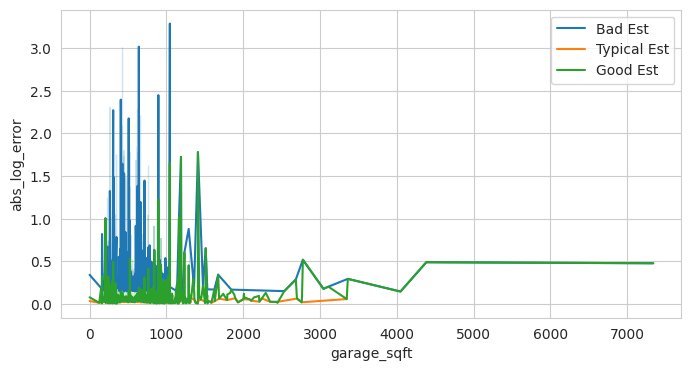

In [153]:
# See how garage_sqft affects different estimate segments
plt.figure(figsize=(8,4))
sns.lineplot(x='garage_sqft', y='abs_log_error', data=bad_est, label='Bad Est')
sns.lineplot(x='garage_sqft', y='abs_log_error', data=typical_est, label='Typical Est')
sns.lineplot(x='garage_sqft', y='abs_log_error', data=good_est, label='Good Est')
plt.legend()

In [154]:
df16.shape

(90275, 51)

In [155]:
df16.nunique()

parcelid                90150
logerror                 1894
transaction_month          12
transaction_day            31
transaction_quarter         4
aircon                      7
architecture                7
basementsqft                6
bathroomcnt                23
bedroomcnt                 17
framing                     2
quality                     8
deck                        2
home_sqft                5102
fips                        3
fireplacecnt                6
garagecarcnt               15
garage_sqft               870
has_spa                     2
heating                    13
latitude                73312
longitude               71900
lot_sqft                20016
poolcnt                     2
poolsizesum                 6
pool_with_spa               2
pool_without_spa            2
county_land_use_code       77
land_use_code              14
zoning_code               191
city                      178
county                      3
neighborhood              193
zipcode   

We will need to one-hot-encode our cat columns and scale our numerical columns. For now, we will save this clean dataframe.



In [157]:
from google.colab import files
df16.to_csv('zillow_clean.csv', encoding = 'utf-8-sig', index='False') 
files.download('zillow_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>